#  Introdução e Questão Central

Em maio de 2021, o Laboratório Espaço Público e Direito à Cidade associado à Faculdade de Arquitetura e Urbanismo da Universidade de São Paulo publicou o artigo [*Prioridade na vacinação negligencia a geografia da Covid-19 em São Paulo*](http://www.labcidade.fau.usp.br/prioridade-na-vacinacao-negligencia-a-geografia-da-covid-19-em-sao-paulo/). As ótimas visualizações de dados sobre COVID-19 mostraram a distribuição geográfica na cidade de São Paulo de contágios, internações, mortes e vacinações, de forma agregada desde o início da pandemia.

<div style="text-align: center;">
    <img src="http://www.labcidade.fau.usp.br/wp-content/uploads/2021/05/capa-5-1536x807.png" width=70%><p style="display: block; text-align:center"><i>Fonte: labcidade.fau.usp.br</i></p>
</div>

A imagem acima abre o artigo e contém o modelo de mapa que será explorado com diversas variáveis. Nos restringindo apenas a essa imagem, é possível visualizar uma maior concentração de casos na periferia (cores mais intensas na metade esquerda), enquanto a concentração de vacinação apresentam uma distribuição exatamente inversa (cores mais intensas na metade direita). Esta segregação geográfica é recorrente nos diversos gráficos apresentados e reflete a profunda desigualdade da cidade de São Paulo em diversas manifestações: sanitárias, censitárias, raciais, sociais... 

No entanto, esta desigualdade geográfica não é restrita a esta cidade, nem ao tema sanitário, que é o ponto central da análise. 

<div class='alert alert-info' style="font-size: medium">
Diante disto, fiquei instigado sobre a seguinte questão: a distribuição geográfica de vacinações no Brasil apresentaria algum padrão semelhante a este? Dito de outra forma, <strong>seria possível encontrar desigualdades recorrentes na imunização das populações das diferentes Unidades da Federação?</strong> Esta é a pergunta que guia toda a análise deste caderno.
</div>

Afinal, se houver tal padrão histórico que indique que certas Unidades Federativas possuem taxas de imunização maiores do que outras, teríamos evidências para rejeitar a hipótese de que este mesmo padrão possa ser reproduzido na distribuição de imunizações contra a COVID-19? 

Para explorar esta questão, utilizaremos dados do DataSUS sobre o Programa Nacional de Imunizações para comparar as coberturas vacinais agregadas nas 27 unidades federativas brasileiras entre 2017 e 2020, um intervalo de 4 anos.

*Para mais informações sobre os dados, veja o [caderno 2](./2_-_preparacao_dos_dados.ipynb).*

# Preparando o ambiente


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from mapclassify import classify

from IPython.display import Markdown
from IPython.core.display import display, HTML

from my_modules.brazil_states_geodata import estados_geo, geo_colors_plot
from my_modules.brazil_colors import brazil_colormaps, create_ordered_colormap

In [130]:
def print_html(text: str, alert_type: str = '', fontsize:str = 'small'):
    """
    alert_type: info(blue), danger(red), warning(yellow), success(green)
    font-size: descriptive(small, medium...); pixels (12px, 20px....); percentage (120%)
    """

    alert_type = f'class="alert alert-{alert_type}"'
    
    html = f'<div {alert_type} style="font-size: {fontsize}">{text}</div>'
    
    display(HTML(html))
    
# plt.rcParamsDefault

plt.rcParams.update({
    'font.size': 12.0,
    'axes.labelsize': 'large',
    'axes.labelpad': '10.0',
    'axes.titlesize': 20,
    'figure.titlesize': 28,
    'figure.titleweight':'bold',
    'legend.title_fontsize': 'large',
})

#           'font.stretch': 'normal',
#           'font.style': 'normal',
#           'font.variant': 'normal',
#           'font.weight': 'normal',

## Referência: Cores e Siglas das Estados

Ao longo do caderno, serão utilizados os padrões de cores expostos no gráfico abaixo.

Norte - Verde | Nordeste - Vermelho | Sudeste - Roxo | Sul - Azul | Centro-Oeste - Laranja/Amarelo

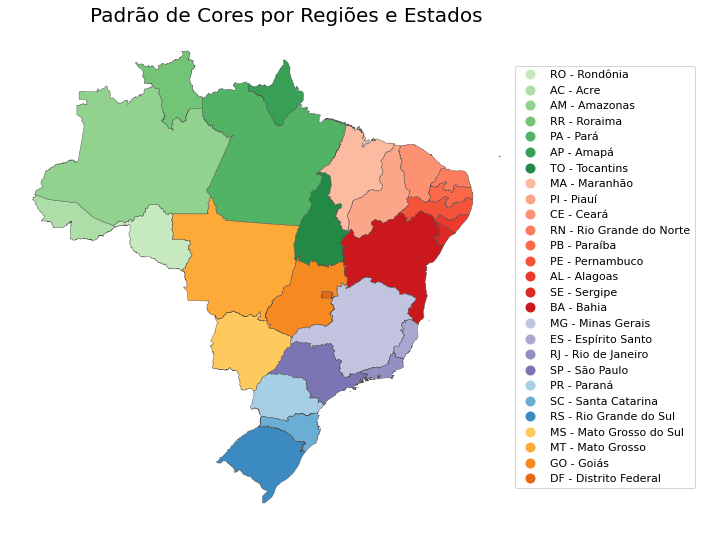

In [128]:
fig, ax = plt.subplots(figsize=(10,10))#, dpi=300)
geo_colors_plot(estados_geo, brazil_colormaps['States'], ax=ax)

In [5]:
## dir
processed_datadir = '../data/processed/'

filename = '2017_2020_coberturas_vacinais_por_imuno_segundo_unidade_da_federacao'
path = processed_datadir + filename + '.csv.gz'

imunizacao_ufs = pd.read_csv(path, encoding='ISO-8859-1', sep =';', compression='gzip')

A media dos valores e o total oficial são muito próximos. Podemos retirar esta linha sem problemas.

In [5]:
imunizacao_ufs

,uf,imuno,ano,cobertura_vacinal
0,Rondônia,BCG,2017,97.81
1,Acre,BCG,2017,96.83
2,Amazonas,BCG,2017,93.82
3,Roraima,BCG,2017,116.74
4,Pará,BCG,2017,85.83
...,...,...,...,...
2263,Rio Grande do Sul,dTpa gestante,2020,53.54
2264,Mato Grosso do Sul,dTpa gestante,2020,52.92
2265,Mato Grosso,dTpa gestante,2020,58.15
2266,Goiás,dTpa gestante,2020,46.44


# Anos Agregados (2017-2020)

Primeiro podemos visualizar os dados do coberturas vacinais para todos os 4 anos e 21 imunos, segmentando apenas por estado. Neste caso cada unidade federativa terá 84 pontos agrupados verticalmente. 

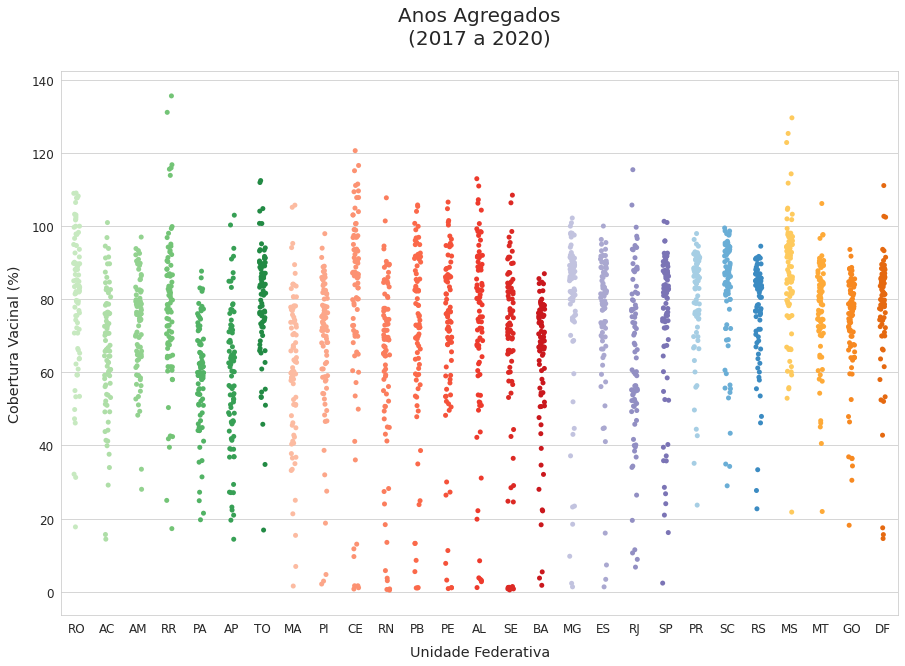

In [15]:
# sns.set_style('whitegrid')

with sns.axes_style('whitegrid'):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot()

    sns.stripplot(ax=ax, data=imunizacao_ufs, x = 'uf', y = 'cobertura_vacinal',
                 palette=brazil_colormaps['States'].colors)#, hue='ano')

    # talvez usar siglas ao invés de nomes de estados
    # ax.get_xticklabels()
    ax.set_xticklabels(estados_geo.sigla.to_list())
    # ax.axhline(y=100, xmin=0, xmax=1, linestyle="--", color='0.3', linewidth=0.75)
    ax.set(xlabel= "Unidade Federativa", ylabel= 'Cobertura Vacinal (%)', title="Anos Agregados\n(2017 a 2020)\n")

    # legenda com estados_geo.sigla.to_dict() + cores.

    plt.show()

Comecemos explorando os extremos. Os valores acima de 100% e os valores abaixo de 20%. Afinal o quanto estes valores representam em relação ao total? Deveríamos retirá-los?
    

In [8]:
menor_que_20 = len(imunizacao_ufs.query("cobertura_vacinal<20")) / len(imunizacao_ufs)
maior_que_100 = len(imunizacao_ufs.query("cobertura_vacinal>100")) / len(imunizacao_ufs)
entre_20_e_100 = 1 - (menor_que_20 + maior_que_100)

html = 'Vemos que as observações <u>inferiores a 20%</u> representam <b>{:.2f}%</b> do número total, \
enquanto os valores <u>acima de 100%</u> representam <b>{:.2f}%</b> do total.<br>\
Portanto, os outros <b>{:.2f}%</b> das observações possuem entre 20% e 100% de cobertura vacinal.'.format(menor_que_20*100, maior_que_100*100, entre_20_e_100*100)
# display(HTML(html))

print_html(html, 'info', 'medium')

# md = 'Vemos que as observações menores que 20% representam **{:.2f}%** do número total,\
# enquanto os valores acima de 100% representam **{:.2f}%** do total.'.format(menor_que_20*100, maior_que_100*100)
# Markdown(md)

Como o objetivo desta exploração é a relação entre as unidades federativas, os valores acima de 100% não são problemáticos por si só. Poderiam ser caso alguns estados específicos possuíssem uma grande quantidade de valores nesta faixa. No nosso caso não impactarão tanto, pois analisaremos a relação entre as unidades federativas a partir da média dos valores.

Um questionamento semelhante seria: qual o intervalo que contém **metade** das observações?

In [21]:
Q1_2017_2020 = imunizacao_ufs.cobertura_vacinal.describe()['25%']
Q3_2017_2020 = imunizacao_ufs.cobertura_vacinal.describe()['75%']

html = 'Metade das observações sobre coberturas vacinais dos últimos 4 anos está entre <strong>{:.2f}% e {:.2f}%</strong>.'.format(Q1_2017_2020, Q3_2017_2020)
print_html(html, "info", 'medium')
Markdown('Graficamente, isto significa que metade de todos os pontos do gŕafico estão localizados na área de cor cinza abaixo, sobreposta ao gráfico anterior.')

Graficamente, isto significa que metade de todos os pontos do gŕafico estão localizados na área de cor cinza abaixo, sobreposta ao gráfico anterior.

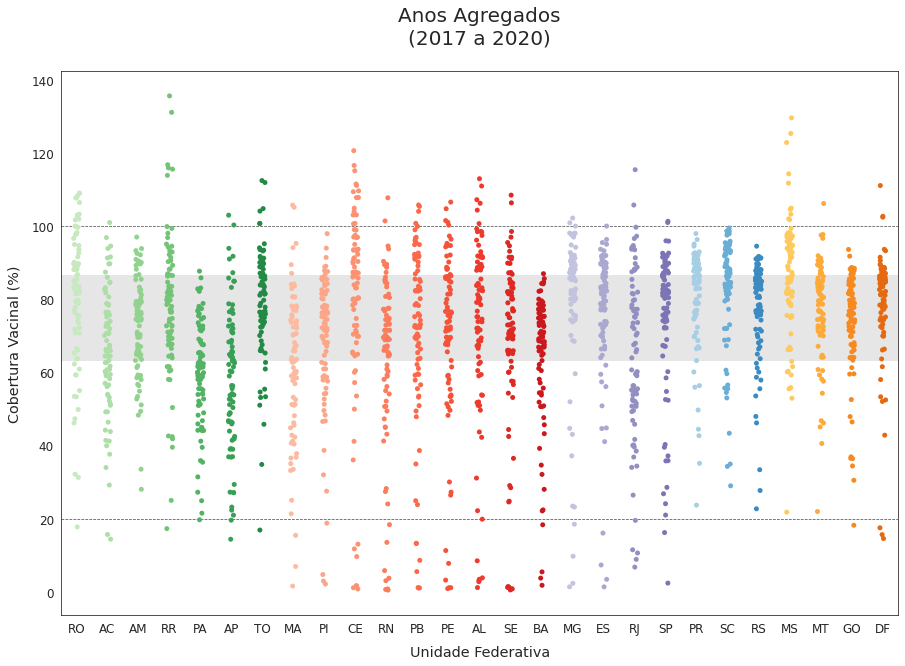

In [14]:
# sns.set_style('whitegrid')

with sns.axes_style('white'):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot()

    sns.stripplot(ax=ax, data=imunizacao_ufs, x = 'uf', y = 'cobertura_vacinal',
                 palette=brazil_colormaps['States'].colors)#, hue='ano')

# talvez usar siglas ao invés de nomes de estados
# ax.get_xticklabels()
ax.set_xticklabels(estados_geo.sigla.to_list())

ax.axhline(y=20, xmin=0, xmax=1, linestyle="--", color='0.3', linewidth=0.75)
ax.axhline(y=100, xmin=0, xmax=1, linestyle="--", color='0.3', linewidth=0.75)

ax.set(xlabel= "Unidade Federativa", ylabel= 'Cobertura Vacinal (%)', title="Anos Agregados\n(2017 a 2020)\n")
# add gray area for interquartile range
ax.axhspan(ymin=Q1_2017_2020, ymax=Q3_2017_2020, facecolor = '0.9')
# legenda com estados_geo.sigla.to_dict() + cores.

plt.show()

Até agora tivemos uma visão geral da situação agregada dos 4 anos, mas seria interessante também segmentar para cada ano, visualizando melhor mudanças ao longo do tempo. É o que faremos agora.

# Dados Anuais (2017-2020)

In [96]:
intervalo_interquartil_por_ano = {}
for ano in range(2017,2021):
    with sns.axes_style('white'):
        fig = plt.figure(figsize=(15,10))
        ax = fig.add_subplot()

        data_to_plot= imunizacao_ufs.query("ano==@ano")

        sns.stripplot(ax=ax, data=data_to_plot, x = 'uf', y = 'cobertura_vacinal',
                     palette=brazil_colormaps['States'].colors)#, hue='ano')

        Q1 = data_to_plot.cobertura_vacinal.describe()['25%']
        Q3 = data_to_plot.cobertura_vacinal.describe()['75%']
        intervalo_interquartil_por_ano[ano] = (Q1, Q3)
            
        ax.set_xticklabels(estados_geo.sigla.to_list())
        ax.axhline(y=100, xmin=0, xmax=1, linestyle="--", color='0.3', linewidth=0.75)
        ax.set_ylim(0,140)
        ax.set(xlabel= "Unidade Federativa", ylabel= 'Cobertura Vacinal (%)', title=ano)
        ax.axhspan(ymin=Q1, ymax=Q3, facecolor = '0.9')
        
        fig.savefig("../reports/figures/swarmplots/" + str(ano) + "_to_gif.png")
        plt.close()
#         plt.show()
# printing interquartile range by year
print('\n Ano: Fronteiras da área cinza onde se concentram metade dos valores')
for ano, (q1, q3) in intervalo_interquartil_por_ano.items():
    print('{}: {:.2f} ~ {:.2f}'.format(ano, q1, q3))
print('')


 Ano: Fronteiras da área cinza onde se concentram metade dos valores
2017: 65.04 ~ 85.82
2018: 66.61 ~ 91.22
2019: 66.37 ~ 87.69
2020: 55.53 ~ 81.30



![swarmplot-gif](../reports/figures/swarmplot_2017_2020.gif)

Ao segregar a série acima para cado ano do período, é possível notar algumas mudanças.

- Em primeiro lugar, a grande queda em 2020.

- A região Nordeste tende a ter ponto baixíssimos.



- queda no IQ em 2020.


- estados do sul nunca passam de 100%, nordeste e sudeste com indices baixos. Poucos valores abaixo de 40%, é o ano de 2020 que jgoa todo mundo pra baixo

- não ha grandes mudanças entre os estados
-> ja linkando pra analise entre estados com geoplot

Apesar destas informações, até agora não fomos capazes de extrair muito informação entre estados, apenas de como a série geral se comportou ao longo dos anos.

-------

# Comparando Estados

In [118]:
def double_br_geoplot(ano: int, gdf: gpd.GeoDataFrame, save=True):

    # ano = 2017
    # gdf = estados_geo
    titles= ['Unidades Federativas Agrupadas\nPor Quartis', 'Unidades Federativas Agrupadas\nPor Intervalos Fixos']

    bins=[60, 65, 70, 75, 80]
    schemes = ['quantiles', 'UserDefined']
    cmaps = ['coolwarm_r', "cividis"]
    column= str(ano) + '_cobertura_vacinal'

    data_to_plot = imunizacao_ufs.query("ano==@ano").groupby(by='uf', sort=False).mean().round(2).cobertura_vacinal

    if gdf.index.equals(data_to_plot.index):
        gdf[column] = data_to_plot
    else: 
        print('Can\'t merge. Indexes are not the same')
        return
    # fig, axs = plt.subplots(1,2,figsize=(10,10), facecolor='0.5')
    fig, axs = plt.subplots(1,2, constrained_layout=False ,figsize=(20,10))

    gdf.plot(
        column=column,
        edgecolor='0.5',
#         linewidth=.1
        cmap=cmaps[0], 
        scheme = schemes[0],
        k=4,
        legend=True,
        legend_kwds=dict(loc='center right', bbox_to_anchor=(1,0.1), title="Cobertura Vacinal\n", title_fontsize= 'medium'),
        ax=axs[0])

    gdf.plot(
        column=column,
        edgecolor='0.5',
        cmap=cmaps[1],
        scheme = schemes[1],
    #     k=4,
        legend=True,
        legend_kwds=dict(loc='center right', bbox_to_anchor=(1,0.1), title="Cobertura Vacinal\n", title_fontsize= 'medium'),
        ax=axs[1],
        classification_kwds = dict(bins=bins))

    ## formatting legend
#     for i in range(len(axs.flatten())):
    for i in range(len(axs.flatten())):

        axs[i].set_title(titles[i])
        axs[i].axis('off')

        custom_classifier = classify(y=data_to_plot, scheme=schemes[i], bins=bins*i, k=4+i)
        
        legend_texts = axs[i].get_legend().texts
        for legend_number in range(len(legend_texts)):
            vmin,vmax = legend_texts[legend_number].get_text().split(", ")
            number_of_states_per_class = custom_classifier.counts[legend_number]
            
            text_to_write = '{:.2f} a {:.2f}%  ({} UFs)'.format(float(vmin), float(vmax), number_of_states_per_class)
            legend_texts[legend_number].set_text(text_to_write)
            
            if i ==1 :
                
                text_to_write = f'≤ {bins[0]}%  ({number_of_states_per_class} UFs)' if f'a {bins[0]}.00%' in text_to_write else text_to_write
                text_to_write = f'> {bins[-1]}%  ({number_of_states_per_class} UFs)' if f'{bins[-1]}.00 a' in text_to_write else text_to_write
                text_to_write = text_to_write.replace('.00', '')
                legend_texts[legend_number].set_text(text_to_write)
                
    fig.suptitle(f"{ano}")
    
    if save == True:
        fig.savefig("../reports/figures/cloropleths/geo" + str(ano) + "_to_gif.png", facecolor='w',transparent=None)
        plt.close()
    else: 
        plt.show()

In [73]:
def mono_br_geoplot(ano: int, gdf: gpd.GeoDataFrame, which_plot=0):

    # ano = 2017
    # gdf = estados_geo
    titles= [f'Unidades Federativas Agrupadas\nPor Quartis ({ano})', f'Unidades Federativas Agrupadas\nPor Intervalos Fixos ({ano})']

    bins=[60, 65, 70, 75, 80]
    schemes = ['quantiles', 'UserDefined']
    cmaps = ['coolwarm_r', "cividis"]
    column= str(ano) + '_cobertura_vacinal'

    data_to_plot = imunizacao_ufs.query("ano==@ano").groupby(by='uf', sort=False).mean().round(2).cobertura_vacinal

    if gdf.index.equals(data_to_plot.index):
        gdf[column] = data_to_plot
    else: 
        print('Can\'t merge. Indexes are not the same')
        return
    # fig, axs = plt.subplots(1,2,figsize=(10,10), facecolor='0.5')
    fig, ax = plt.subplots(1,1, figsize=(10,10))

    if which_plot==0:
        gdf.plot(
            column=column,
            edgecolor='0.5',
    #         linewidth=.1
            cmap=cmaps[0], 
            scheme = schemes[0],
            k=4,
            legend=True,
            legend_kwds=dict(loc='center right', bbox_to_anchor=(1,0.1), title="Cobertura Vacinal\n", title_fontsize= 'medium'),
            ax=ax)
    else:
        gdf.plot(
            column=column,
            edgecolor='0.5',
            cmap=cmaps[1],
            scheme = schemes[1],
        #     k=4,
            legend=True,
            legend_kwds=dict(loc='center right', bbox_to_anchor=(1,0.1),  title="Cobertura Vacinal\n", title_fontsize= 'medium'),
            ax=ax,
            classification_kwds = dict(bins=bins))

    ## formatting legend
#     for i in range(len(axs.flatten())):
#     iterable = []
    
#     for i in iterable:
#         if axs[i] is not None:
    i = 0
    axs = [ax]
    
    axs[i].set_title(titles[which_plot])
    axs[i].axis('off')

    custom_classifier = classify(y=data_to_plot, scheme=schemes[which_plot], bins=bins*which_plot, k=4+which_plot)

    legend_texts = axs[i].get_legend().texts

    for legend_number in range(len(legend_texts)):
    
        vmin,vmax = legend_texts[legend_number].get_text().split(", ")
        number_of_states_per_class = custom_classifier.counts[legend_number]

        text_to_write = '{:.2f} a {:.2f}%  ({} UFs)'.format(float(vmin), float(vmax), number_of_states_per_class)
        legend_texts[legend_number].set_text(text_to_write)

        if which_plot == 1 :

            text_to_write = f'≤ {bins[0]}%  ({number_of_states_per_class} UFs)' if f'a {bins[0]}.00%' in text_to_write else text_to_write
            text_to_write = f'> {bins[-1]}%  ({number_of_states_per_class} UFs)' if f'{bins[-1]}.00 a' in text_to_write else text_to_write
            text_to_write = text_to_write.replace('.00', '')
            legend_texts[legend_number].set_text(text_to_write)


## Situação por UF em 2017

Na esquerda, observamos s relação entre estados, a escala é móvel, os quartils sao fixos

na direita, temos a escala fixa, podendo observar a variação dos estados ao longo dos anos.

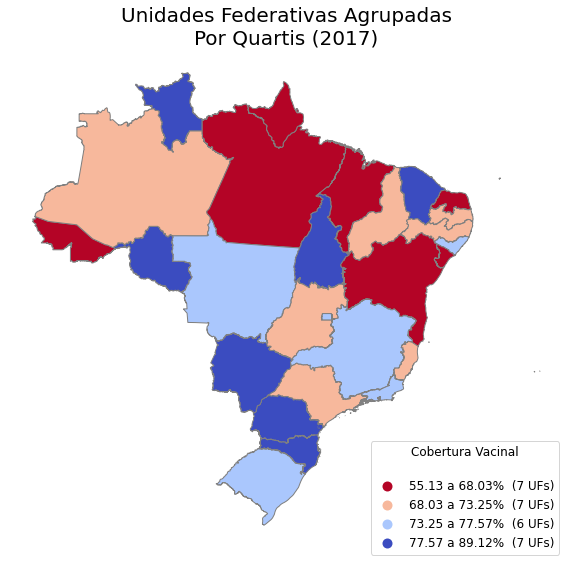

In [62]:
mono_br_geoplot(ano=2017, gdf=estados_geo, which_plot=0)

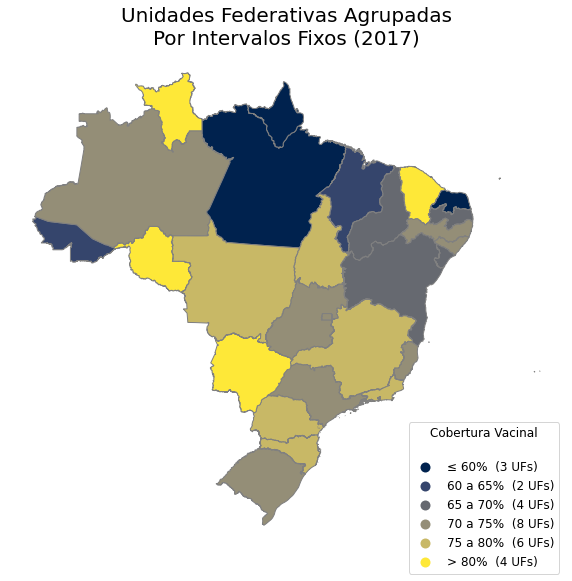

In [74]:
mono_br_geoplot(ano=2017, gdf=estados_geo, which_plot=1)

In [119]:
for ano in range(2017,2021):
    double_br_geoplot(ano=ano, gdf=estados_geo)

![cloropleth-gif](../reports/figures/cloropleth_2017_2020.gif)

73.25 é a mediana.
dos valores iniciais apenas o primeiro está contido, o mínimo

## Situação por UF no período total 2017-2020

In [131]:
anos = range(2017,2021)

ordered_states = list(imunizacao_ufs.uf.unique())
state_counter = {key:[0,0,0,0] for key in ordered_states}

for ano in anos:
#     print(ano)
    
    data_to_plot = imunizacao_ufs.query("ano==@ano").groupby(by='uf', sort=False).mean().round(2).cobertura_vacinal
    custom_classifier = classify(y=data_to_plot, scheme='quantiles', k=4)#, bins=bins*which_plot, k=4+which_plot)
    
    counter = 0    
        
    for each_class in custom_classifier.classes:
#         print (each_class, counter)
        for state_position in each_class:
            state = ordered_states[state_position]
            state_counter[state][counter] += 1

        counter += 1
        
# state_counter

In [22]:
state_counter_df = pd.DataFrame.from_dict(state_counter, orient = 'index', 
                       columns=[txt + '_25%' for txt in ('1os', '2os', '3os', '4os')])
state_counter_df

,1os_25%,2os_25%,3os_25%,4os_25%
Rondônia,0,0,1,3
Acre,3,0,1,0
Amazonas,0,3,0,1
Roraima,0,1,1,2
Pará,4,0,0,0
Amapá,4,0,0,0
Tocantins,0,0,1,3
Maranhão,4,0,0,0
Piauí,1,3,0,0
Ceará,0,1,1,2


In [23]:
state_counter_df = pd.DataFrame.from_dict(state_counter, orient = 'index', 
                       columns=[txt + '_25%' for txt in ('1os', '2os', '3os', '4os')])

state_counter_df = state_counter_df.melt(ignore_index=False).reset_index()

new_columns = dict(zip(state_counter_df.columns, ['uf', 'grupo', 'aparicoes']))

state_counter_df.rename(columns= new_columns, inplace=True)

lista = []
for aparicoes, grupo in zip(state_counter_df.aparicoes, state_counter_df.grupo):
    lista.append((aparicoes * [grupo]))
    
# lista
state_counter_df['aparicoes_por_grupo'] = lista

state_counter_df = state_counter_df.explode(column='aparicoes_por_grupo').dropna()

state_counter_df = state_counter_df.reset_index(drop=True)

In [7]:
state_counter_df

,uf,grupo,aparicoes,aparicoes_por_grupo
0,Acre,1os_25%,3,1os_25%
1,Acre,1os_25%,3,1os_25%
2,Acre,1os_25%,3,1os_25%
3,Pará,1os_25%,4,1os_25%
4,Pará,1os_25%,4,1os_25%
...,...,...,...,...
103,Mato Grosso do Sul,4os_25%,3,4os_25%
104,Mato Grosso do Sul,4os_25%,3,4os_25%
105,Mato Grosso do Sul,4os_25%,3,4os_25%
106,Mato Grosso,4os_25%,1,4os_25%


##  swarmplot coolwarm

In [9]:
uf_siglas_dict = (estados_geo.sigla).to_dict()
labels_state_order = [state.get_text() for state in ax.get_xticklabels()]
new_labels = [uf_siglas_dict[state.get_text()] for state in ax.get_xticklabels()]

<ipython-input-52-b29f80b718a6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


<Figure size 432x288 with 0 Axes>

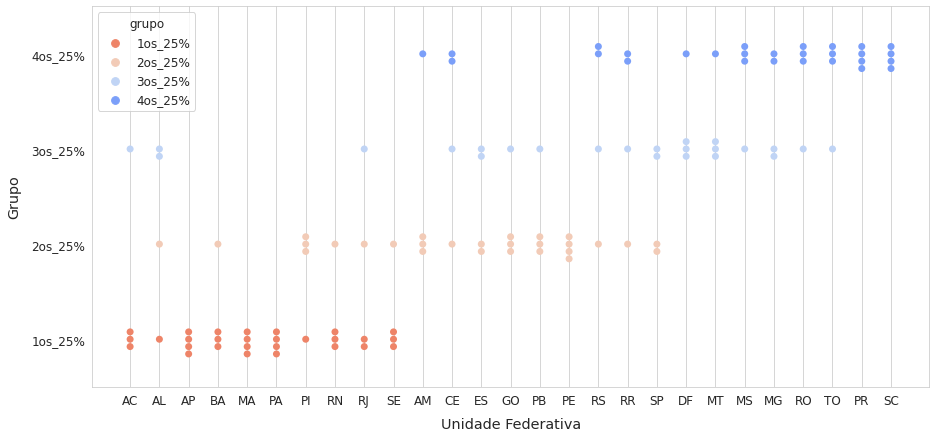

In [52]:
with sns.axes_style('whitegrid'):
    plt.draw()
# with sns.set_theme():
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot()

    sns.swarmplot(ax=ax, data=state_counter_df, x='uf', y='aparicoes_por_grupo',
                size=7, hue='grupo', orient='h',
#                   palette=create_ordered_colormap(index, output_as_list=False, replace_state_color_by_region=True):
                  palette='coolwarm_r')
#                  palette=brazil_colormaps['States'].colors)#, hue='ano')
#     ax.legend(loc='upper left', bbox_to_anchor=(1,1), facecolor='w')
    ax.set_xticklabels(new_labels)
    
    ax.set(xlabel= "Unidade Federativa", ylabel= 'Grupo')
    
    ax.invert_yaxis()
    # ax.set(xlabel='', ylabel='')
    plt.show()
#     print(ax.get_xticklabels())

##  swarmplot brazil

In [33]:
create_ordered_colormap(new_labels, output_as_list=False, replace_state_color_by_region=True)

In [14]:
sns.color_palette(create_ordered_colormap(labels_state_order, output_as_list=False, replace_state_color_by_region=True).colors)

[(0.2949019607843137, 0.6901960784313725, 0.38431372549019605),
 (0.9466666666666667, 0.26823529411764707, 0.19607843137254902),
 (0.2949019607843137, 0.6901960784313725, 0.38431372549019605),
 (0.9466666666666667, 0.26823529411764707, 0.19607843137254902),
 (0.9466666666666667, 0.26823529411764707, 0.19607843137254902),
 (0.2949019607843137, 0.6901960784313725, 0.38431372549019605),
 (0.9466666666666667, 0.26823529411764707, 0.19607843137254902),
 (0.9466666666666667, 0.26823529411764707, 0.19607843137254902),
 (0.5254901960784314, 0.5129411764705882, 0.7403921568627451),
 (0.9466666666666667, 0.26823529411764707, 0.19607843137254902),
 (0.2949019607843137, 0.6901960784313725, 0.38431372549019605),
 (0.9466666666666667, 0.26823529411764707, 0.19607843137254902),
 (0.5254901960784314, 0.5129411764705882, 0.7403921568627451),
 (0.939607843137255, 0.4713725490196078, 0.09490196078431372),
 (0.9466666666666667, 0.26823529411764707, 0.19607843137254902),
 (0.9466666666666667, 0.26823529411764707, 0.19607843137254902),
 (0.2909803921568628, 0.5945098039215686, 0.7890196078431373),
 (0.2949019607843137, 0.6901960784313725, 0.38431372549019605),
 (0.5254901960784314, 0.5129411764705882, 0.7403921568627451),
 (0.939607843137255, 0.4713725490196078, 0.09490196078431372),
 (0.939607843137255, 0.4713725490196078, 0.09490196078431372),
 (0.939607843137255, 0.4713725490196078, 0.09490196078431372),
 (0.5254901960784314, 0.5129411764705882, 0.7403921568627451),
 (0.2949019607843137, 0.6901960784313725, 0.38431372549019605),
 (0.2949019607843137, 0.6901960784313725, 0.38431372549019605),
 (0.2909803921568628, 0.5945098039215686, 0.7890196078431373),
 (0.2909803921568628, 0.5945098039215686, 0.7890196078431373)]

<ipython-input-20-9eb4e2afa9d5>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


<Figure size 432x288 with 0 Axes>

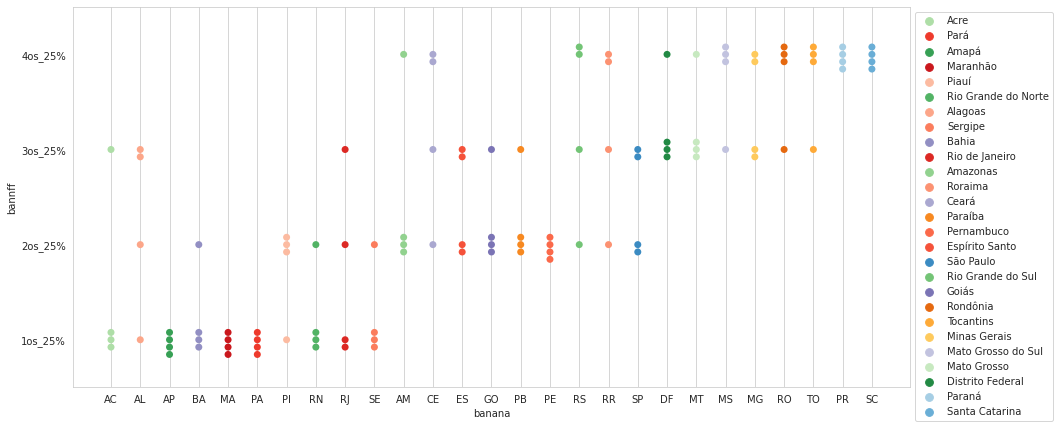

In [20]:
with sns.axes_style('whitegrid'):
# with sns.set_theme():
    plt.draw()
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot()
    
    palette=create_ordered_colormap(labels_state_order, output_as_list=True, replace_state_color_by_region=False)
    sns.swarmplot(ax=ax, data=state_counter_df, x='uf', y='aparicoes_por_grupo',
                 size=7, orient='h', hue='uf',
                 palette=palette)
#                   palette='coolwarm_r')
#                  palette=brazil_colormaps['States'].colors)#, hue='ano')

    ax.set_xticklabels(new_labels)
    
#     labels = ax.get_xticklabels()
#     labels = g.xaxis.get_ticklabels()
#     print(labels)

    # legend_texts = axs[i].get_legend().texts

    #     for legend_number in range(len(legend_texts)):

    #         vmin,vmax = legend_texts[legend_number].get_text().split(", ")
    #         number_of_states_per_class = custom_classifier.counts[legend_number]

    #         text_to_write = '{:.2f} a {:.2f}%  ({} UFs)'.format(float(vmin), float(vmax), number_of_states_per_class)
    #         legend_texts[legend_number].set_text(text_to_write)

    #         if which_plot == 1 :

    #             text_to_write = f'≤ {bins[0]}%  ({number_of_states_per_class} UFs)' if f'a {bins[0]}.00%' in text_to_write else text_to_write
    #             text_to_write = f'> {bins[-1]}%  ({number_of_states_per_class} UFs)' if f'{bins[-1]}.00 a' in text_to_write else text_to_write
    #             text_to_write = text_to_write.replace('.00', '')
    #             legend_texts[legend_number].set_text(text_to_write)

    # ax.set_xticklabels(estados_geo.sigla.to_list())

    # labels = ax.get_xticklabels()
    # print(labels)

    # ax.axhline(y=100, xmin=0, xmax=1, linestyle="--", color='0.3', linewidth=0.75)
    # ax.legend(labels=(estados_geo['sigla'] + ' - ' + estados_geo.index))

    # ax.legend(labels=estados_geo['sigla'] + ' - ' + estados_geo['uf'])

    # scatter.legend(fontsize = 15, \
    #                bbox_to_anchor= (1.03, 1), \
    #                title="Delivery Type", \
    #                title_fontsize = 18, \
    #                shadow = True, \
    #                facecolor = 'white');

    # legenda com estados_geo.sigla.to_dict() + cores.
    ax.legend(loc='upper left', bbox_to_anchor=(1,1), facecolor='w')
    ax.invert_yaxis()
    ax.set(xlabel='banana', ylabel='bannff')
    plt.show()

KeyError: ''

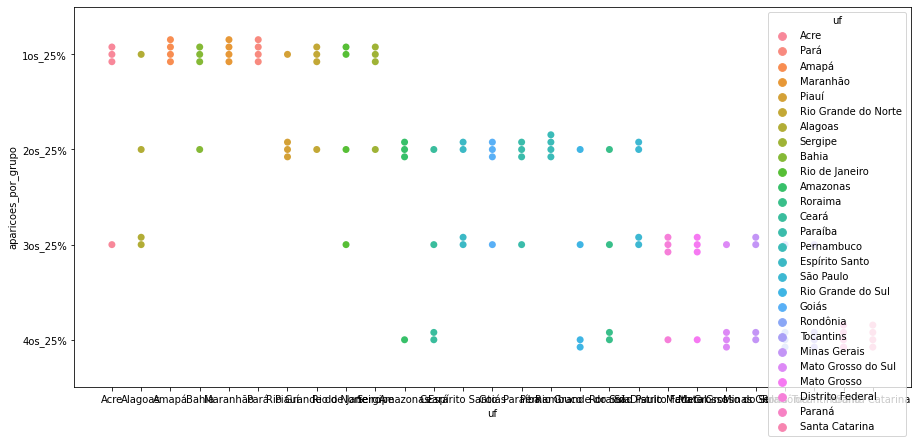

In [25]:
# with sns.axes_style('whitegrid'):
# with sns.set_theme():
fig = plt.figure(figsize=(15,7))
# ax = fig.add_subplot()

ax = sns.swarmplot(data=state_counter_df, x='uf', y='aparicoes_por_grupo',
            size=7, orient='h', hue='uf')
#                   palette=create_ordered_colormap(index, output_as_list=False, replace_state_color_by_region=True):
#                   palette='coolwarm_r')
#                  palette=brazil_colormaps['States'].colors)#, hue='ano')

# talvez usar siglas ao invés de nomes de estados
uf_siglas_dict = (estados_geo.sigla).to_dict()
aa = [uf_siglas_dict[state.get_text()] for state in ax.get_xticklabels()]
ax.set_xticklabels(aa)

#     labels = ax.get_xticklabels()
#     labels = g.xaxis.get_ticklabels()
#     print(labels)

# legend_texts = axs[i].get_legend().texts

#     for legend_number in range(len(legend_texts)):

#         vmin,vmax = legend_texts[legend_number].get_text().split(", ")
#         number_of_states_per_class = custom_classifier.counts[legend_number]

#         text_to_write = '{:.2f} a {:.2f}%  ({} UFs)'.format(float(vmin), float(vmax), number_of_states_per_class)
#         legend_texts[legend_number].set_text(text_to_write)

#         if which_plot == 1 :

#             text_to_write = f'≤ {bins[0]}%  ({number_of_states_per_class} UFs)' if f'a {bins[0]}.00%' in text_to_write else text_to_write
#             text_to_write = f'> {bins[-1]}%  ({number_of_states_per_class} UFs)' if f'{bins[-1]}.00 a' in text_to_write else text_to_write
#             text_to_write = text_to_write.replace('.00', '')
#             legend_texts[legend_number].set_text(text_to_write)

# ax.set_xticklabels(estados_geo.sigla.to_list())

# labels = ax.get_xticklabels()
# print(labels)

# ax.axhline(y=100, xmin=0, xmax=1, linestyle="--", color='0.3', linewidth=0.75)
# ax.legend(labels=(estados_geo['sigla'] + ' - ' + estados_geo.index))

# ax.legend(labels=estados_geo['sigla'] + ' - ' + estados_geo['uf'])

# scatter.legend(fontsize = 15, \
#                bbox_to_anchor= (1.03, 1), \
#                title="Delivery Type", \
#                title_fontsize = 18, \
#                shadow = True, \
#                facecolor = 'white');

# legenda com estados_geo.sigla.to_dict() + cores.
ax.legend(loc='upper left', bbox_to_anchor=(1,1), facecolor='w')
ax.invert_yaxis()
ax.set(xlabel='banana', ylabel='bannff')
plt.show()

In [89]:
uf_siglas_dict = (estados_geo.sigla).to_dict()
ax.set_xticklabels([uf_siglas_dict[state.get_text()] for state in ax.get_xticklabels()])
([uf_siglas_dict[state.get_text()] for state in ax.get_xticklabels()])

['AC',
 'AL',
 'AP',
 'BA',
 'MA',
 'PA',
 'PI',
 'RN',
 'RJ',
 'SE',
 'AM',
 'CE',
 'ES',
 'GO',
 'PB',
 'PE',
 'RS',
 'RR',
 'SP',
 'DF',
 'MT',
 'MS',
 'MG',
 'RO',
 'TO',
 'PR',
 'SC']

In [ ]:
ax.set_xticklabels([uf_siglas_dict[state.get_text()] for state in ax.get_xticklabels()])

# Referencias

[Choropleth Maps - A Guide to Data Classification - GIS Geography](https://gisgeography.com/choropleth-maps-data-classification/)

[Choropleth Mapping — Geographic Data Science with Python](https://geographicdata.science/book/notebooks/05_choropleth.html)

# Contato

